In [2]:
#List comprehension, se tiene que poder bajar de github,  tiene que tener un apply para bajar info, los datos se tienen que manejar con clases y métodos, tiene que tener interfaz gráfica, pandas numpy y alguno de gráficas

In [3]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
paises = ["COL","ARG", "PER", "BRA", "USA", "PAN", "ECU", "CAN"]
df_final = pd.DataFrame()

for pais in paises:
    url = f"https://api.worldbank.org/v2/country/{pais}/indicator/FX.OWN.TOTL.ZS?format=json&date=2021"
    r = requests.get(url)
    data = r.json()

    df = pd.DataFrame(data[1])
    df_t = df[["country", "date", "value"]].copy()
    df_t = df_t.rename(columns={
        "country":"Pais",
        "date": "Año",
        "value": "Porcentaje_de_cuentas"})
    df_t["Pais"] = df_t["Pais"].apply(lambda x: x["value"])
    df_final = pd.concat([df_final, df_t], ignore_index=True)
print(df_final)

            Pais   Año  Porcentaje_de_cuentas
0       Colombia  2021                  59.72
1      Argentina  2021                  71.63
2           Peru  2021                  57.50
3         Brazil  2021                  84.04
4  United States  2021                  94.95
5         Panama  2021                  44.97
6        Ecuador  2021                  64.18
7         Canada  2021                  99.63


In [5]:
paises1 = [pais for pais in df_final["Pais"]]
print("Paises", paises1)
porcentajes = [valor for valor in df_final["Porcentaje_de_cuentas"]]
print("Porcentajes", porcentajes)

Paises ['Colombia', 'Argentina', 'Peru', 'Brazil', 'United States', 'Panama', 'Ecuador', 'Canada']
Porcentajes [59.72, 71.63, 57.5, 84.04, 94.95, 44.97, 64.18, 99.63]


In [6]:
class Cuentas:
    def __init__(self, paises):
        self.paises = paises
        self.df_final = pd.DataFrame()
        self.paises_lista = []
        self.porcentajes_lista = []

    def descargar_datos(self):
        dfs = [
            pd.DataFrame(requests.get(f"https://api.worldbank.org/v2/country/{pais}/indicator/FX.OWN.TOTL.ZS?format=json&date=2021").json()[1])[["country", "date", "value"]].rename(columns={"date": "Año", "value": "Porcentaje_de_cuentas"})
            for pais in self.paises]
        self.df_final = pd.concat(dfs, ignore_index=True)
        self.df_final["country"] = self.df_final["country"].apply(lambda x: x["value"])
        self.paises_lista = [pais for pais in self.df_final["country"]]
        self.porcentajes_lista = [valor for valor in self.df_final["Porcentaje_de_cuentas"]]


    def graficar_barras(self):
        plt.figure(figsize=(10,6))
        plt.bar(self.paises_lista, self.porcentajes_lista, color="royalblue")
        plt.xlabel("Países")
        plt.ylabel("Porcentaje de cuentas (%)")
        plt.title("Porcentaje de población con cuentas financieras por país (2021)")
        plt.xticks(rotation=45)
        plt.ylim(0, 100)
        plt.show()

    def graficar_pie(self):
        plt.figure(figsize=(8,8))
        plt.pie(self.df_final["Porcentaje_de_cuentas"], labels=self.df_final["country"], autopct='%1.1f%%', startangle=140)
        plt.title("Cuentas financieras por país (2021) - Pie")
        plt.axis('equal')
        plt.show()

    def estadisticas(self):
        promedio = np.mean(self.porcentajes_lista)
        maximo = np.max(self.porcentajes_lista)
        minimo = np.min(self.porcentajes_lista)
        print(f"Promedio: {promedio:}%")
        print(f"Máximo: {maximo:}% ({self.paises_lista[self.porcentajes_lista.index(maximo)]})")
        print(f"Mínimo: {minimo:}% ({self.paises_lista[self.porcentajes_lista.index(minimo)]})")


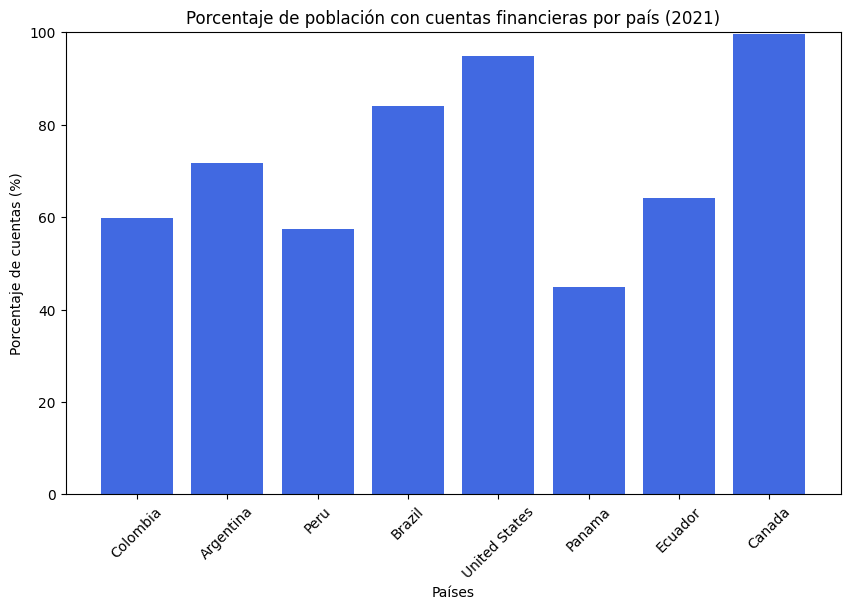

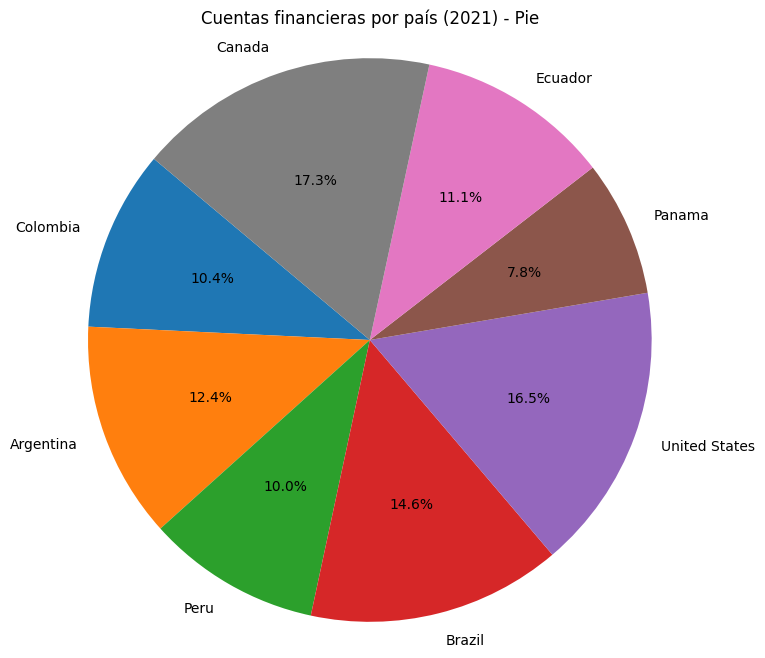

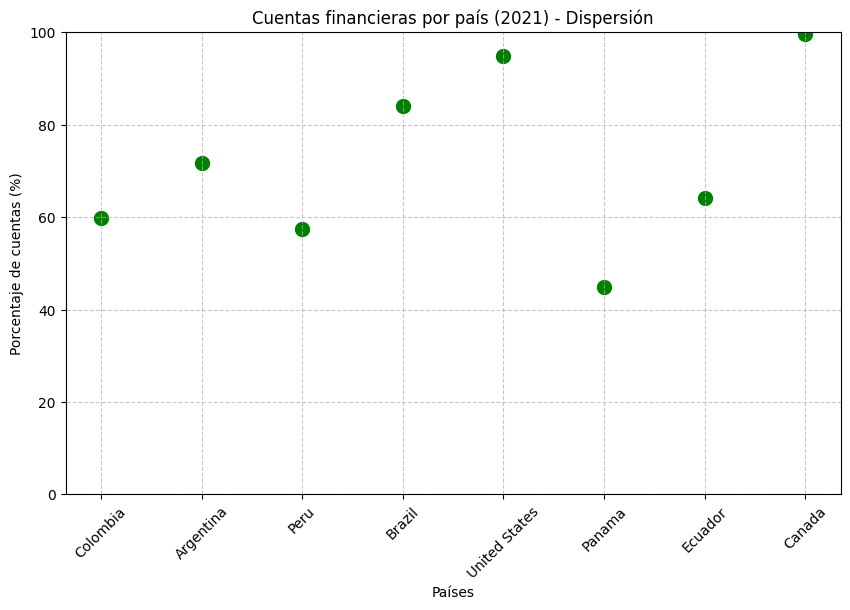

Promedio: 72.0775%
Máximo: 99.63% (Canada)
Mínimo: 44.97% (Panama)


In [7]:
paises = ["COL","ARG","PER","BRA","USA","PAN","ECU","CAN"]
c = Cuentas(paises)
c.descargar_datos()
c.graficar_barras()
c.graficar_pie()
c.graficar_dispersion()
c.estadisticas()

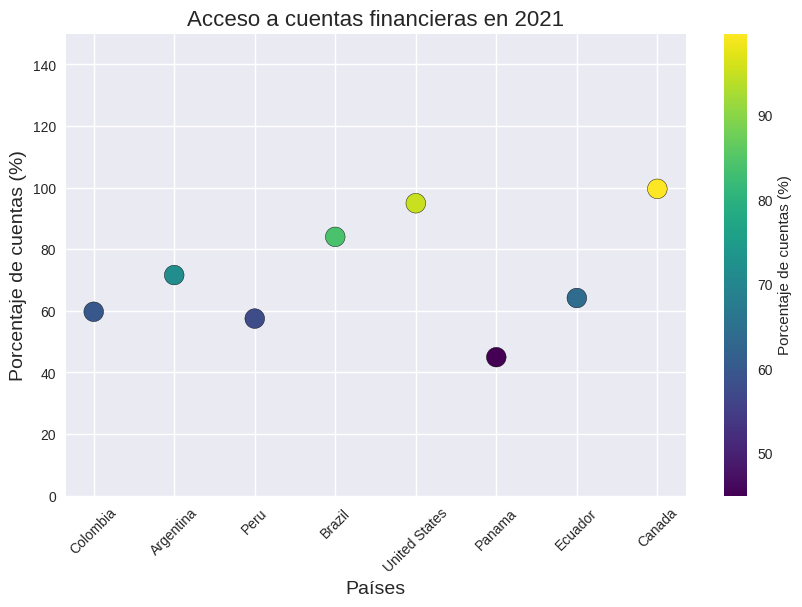

In [9]:
plt.style.use('seaborn-v0_8')
fig, ax = plt.subplots(figsize=(10,6))
sc = ax.scatter(df_final["Pais"], df_final["Porcentaje_de_cuentas"],
                c=df_final["Porcentaje_de_cuentas"], cmap=plt.cm.viridis, s=200, edgecolor="black")
plt.colorbar(sc, ax=ax, label="Porcentaje de cuentas (%)")
ax.set_xlabel("Países", fontsize=14)
ax.set_ylabel("Porcentaje de cuentas (%)", fontsize=14)
ax.set_title("Acceso a cuentas financieras en 2021", fontsize=16)
ax.tick_params(axis="x", labelrotation=45)
ax.set_ylim(0, 150)
plt.show()